In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
class RunResult:
    def __init__(self, errors, evs, params, hessian):
        self.errors = errors
        self.evs = evs
        self.params = params
        self.hessian = hessian

,error,error
0,893363.440985,893363.437294
1,892898.669937,889659.443421
2,892389.787506,885729.082721
3,891830.941169,881544.312802
4,891216.608040,877102.642129
5,890546.066322,872409.778897
6,889800.962323,867465.187771
7,888993.603316,862282.744680
8,888114.099287,856861.977780
9,887149.882864,851247.648770


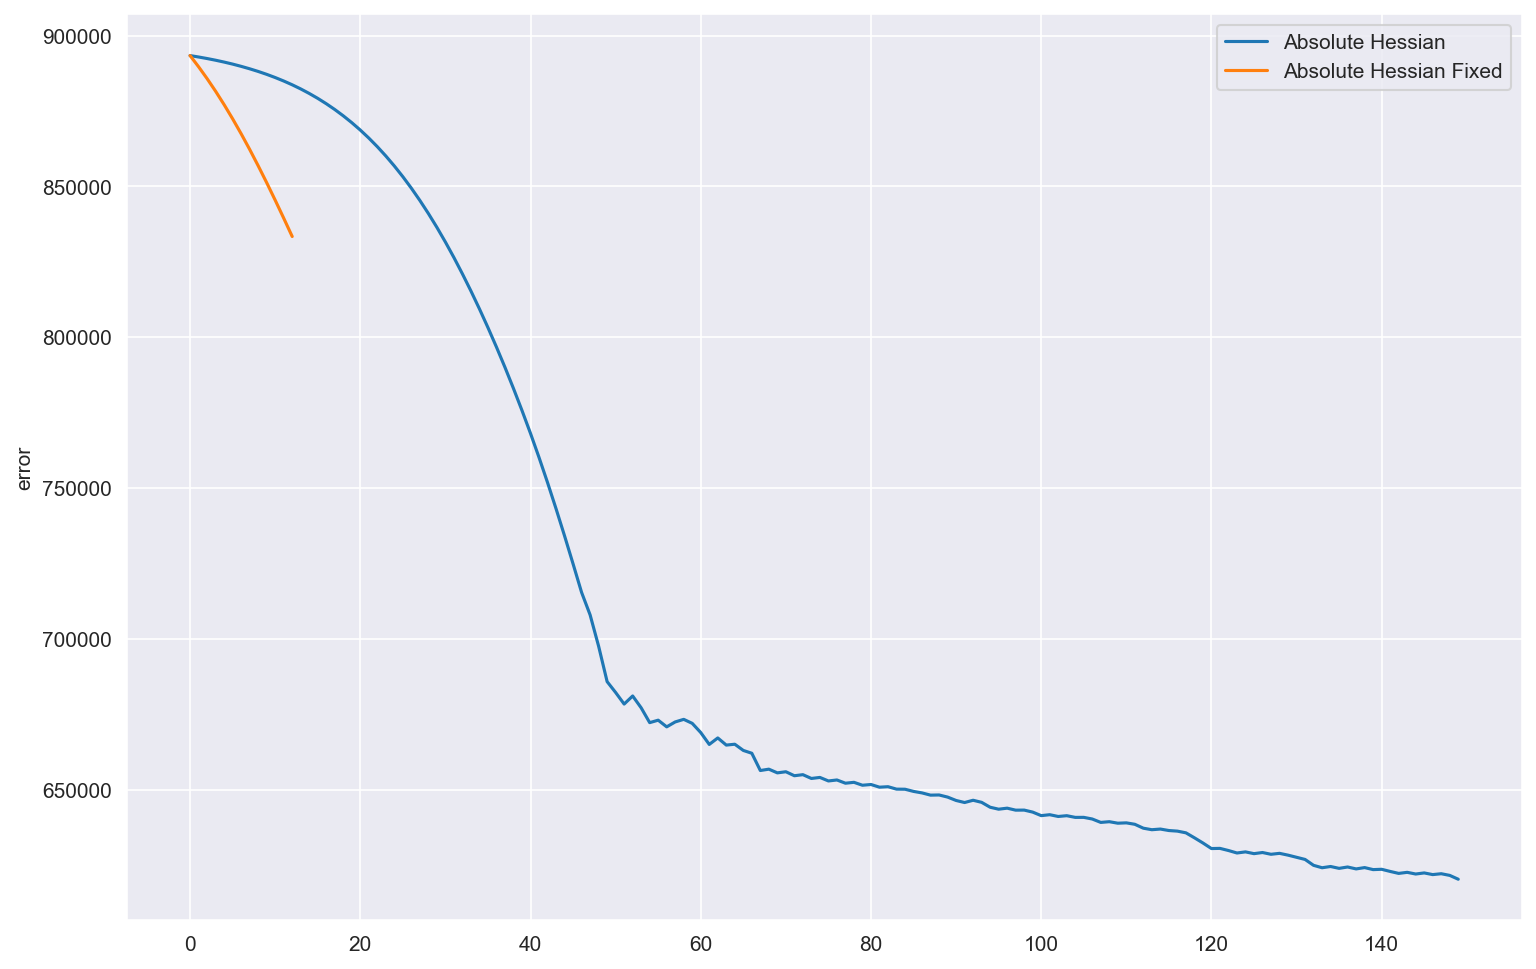

In [92]:
import os

def get_run_result(summ_dir):
    summ_fns = os.listdir(summ_dir)

    jsons = []
    errors = []
    evs = []
    params = []
    hessian = []
    for fn in summ_fns:
        with open(summ_dir + fn) as file:
            data = json.load(file)
            jsons.append(data)
            evs.append(data['evs'])
            errors.append(data['error'])
            params.append(data['params'])
            hessian.append(data['hessian'])


    errors = pd.Series(errors, name='error')
    evs = pd.DataFrame(evs)

    return RunResult(errors, evs, np.array(params), np.array(hessian))

abh = get_run_result('../../archives/abh/summaries/')
abhfixed = get_run_result('../../summaries/')

display(pd.concat([abh.errors, abhfixed.errors], axis=1))

plt.figure(figsize=(12, 8), dpi=150)
ax = 0
for rr in [abh, abhfixed]:
    ax = sns.lineplot(x=rr.errors.index, y=rr.errors)

ax.legend(['Absolute Hessian', 'Absolute Hessian Fixed'])

C:\Users\billi\AppData\Local\Temp\ipykernel_27900\1734696587.py:2: RuntimeWarning: invalid value encountered in true_divide
  hessian_ = (abh.hessian[0] - abhst.hessian[0]) / abh.hessian[0]


<AxesSubplot:>

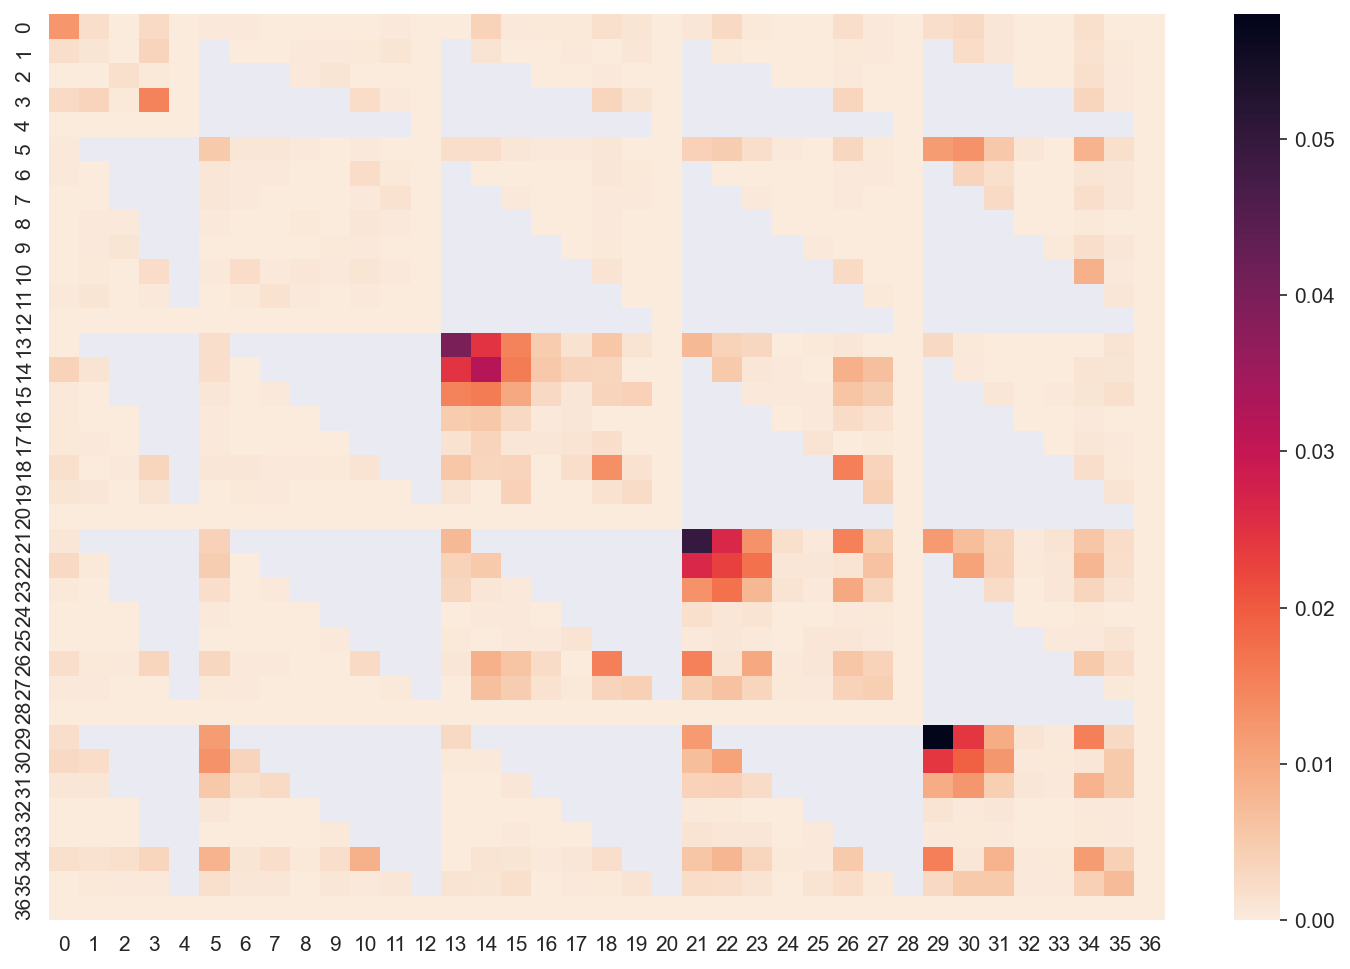

In [76]:

plt.figure(figsize=(12, 8), dpi=150)
hessian_ = (abh.hessian[0] - abhst.hessian[0]) / abh.hessian[0]
sns.heatmap(np.abs(hessian_), cmap='rocket_r')

<AxesSubplot:>

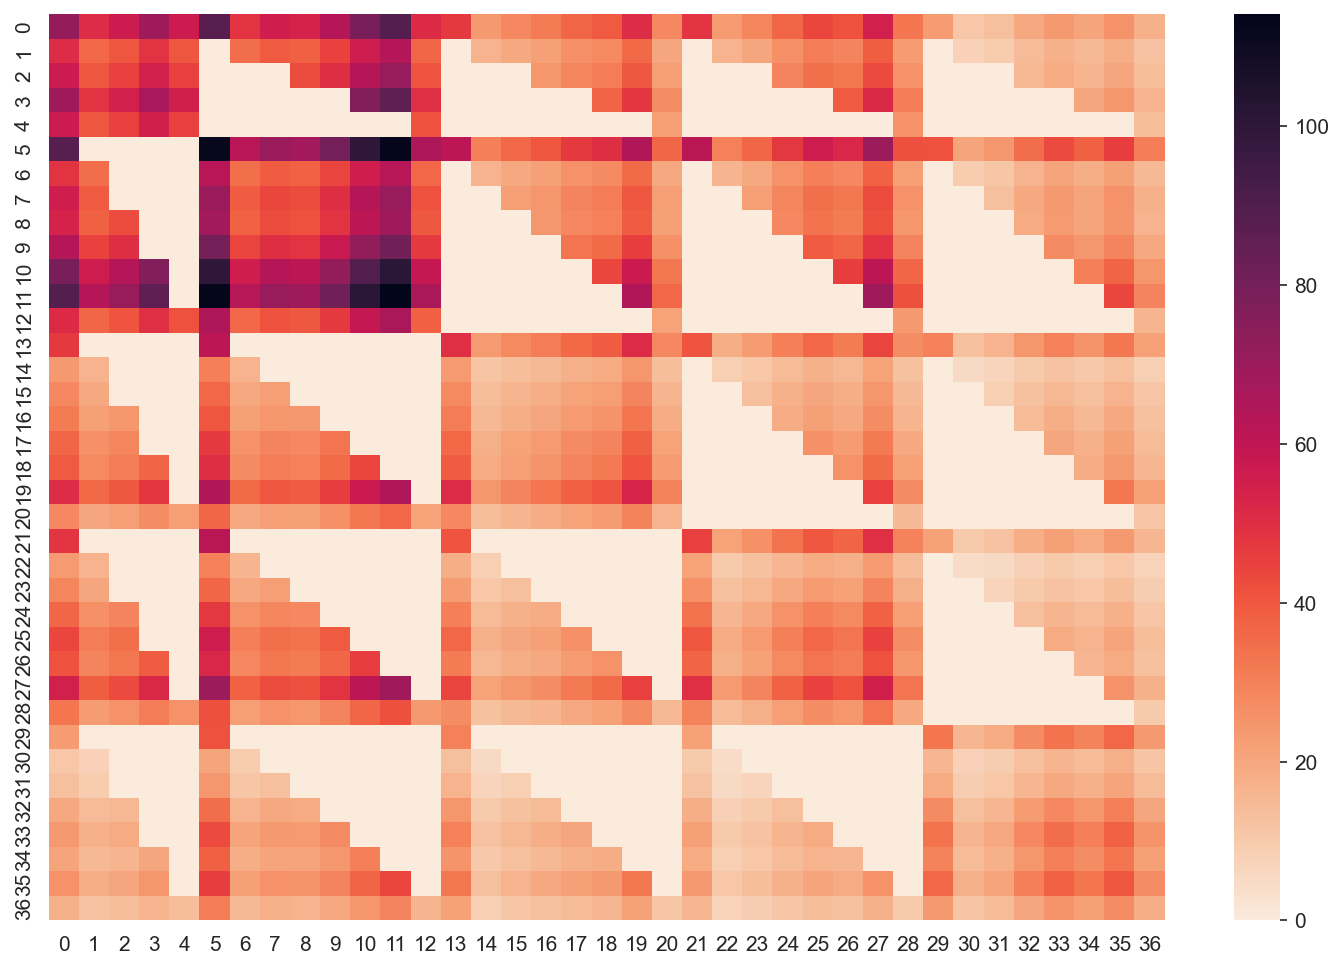

In [79]:
plt.figure(figsize=(12, 8), dpi=150)
hessian_2 = abh.hessian[0]
sns.heatmap(np.power(np.abs(hessian_2), 1/5), cmap='rocket_r')

<AxesSubplot:>

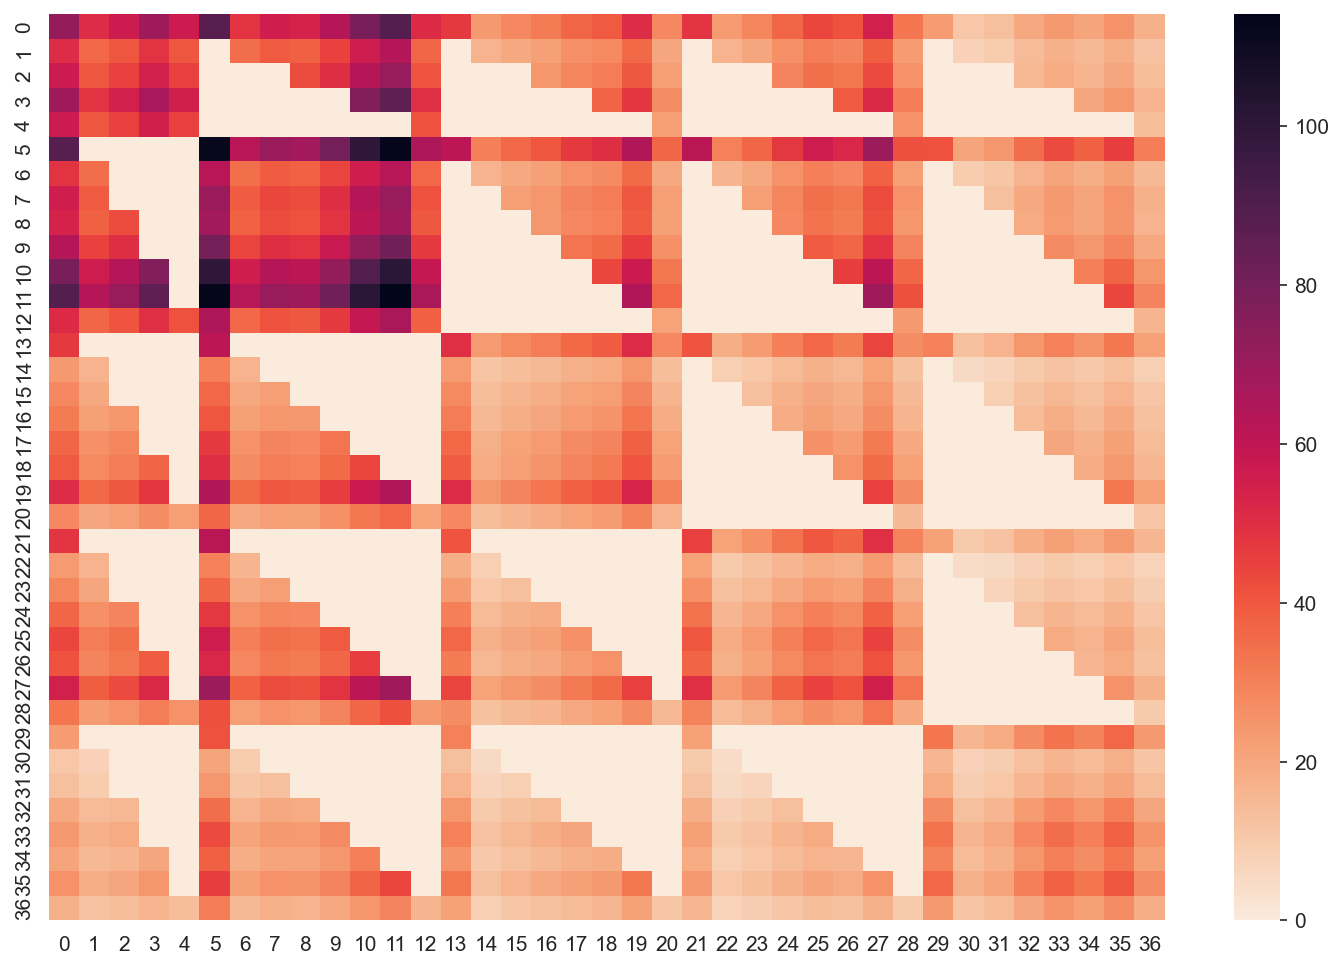

In [94]:
plt.figure(figsize=(12, 8), dpi=150)

sns.heatmap(np.power(np.abs(abh.hessian[0]), 1/5), cmap='rocket_r')

<AxesSubplot:>

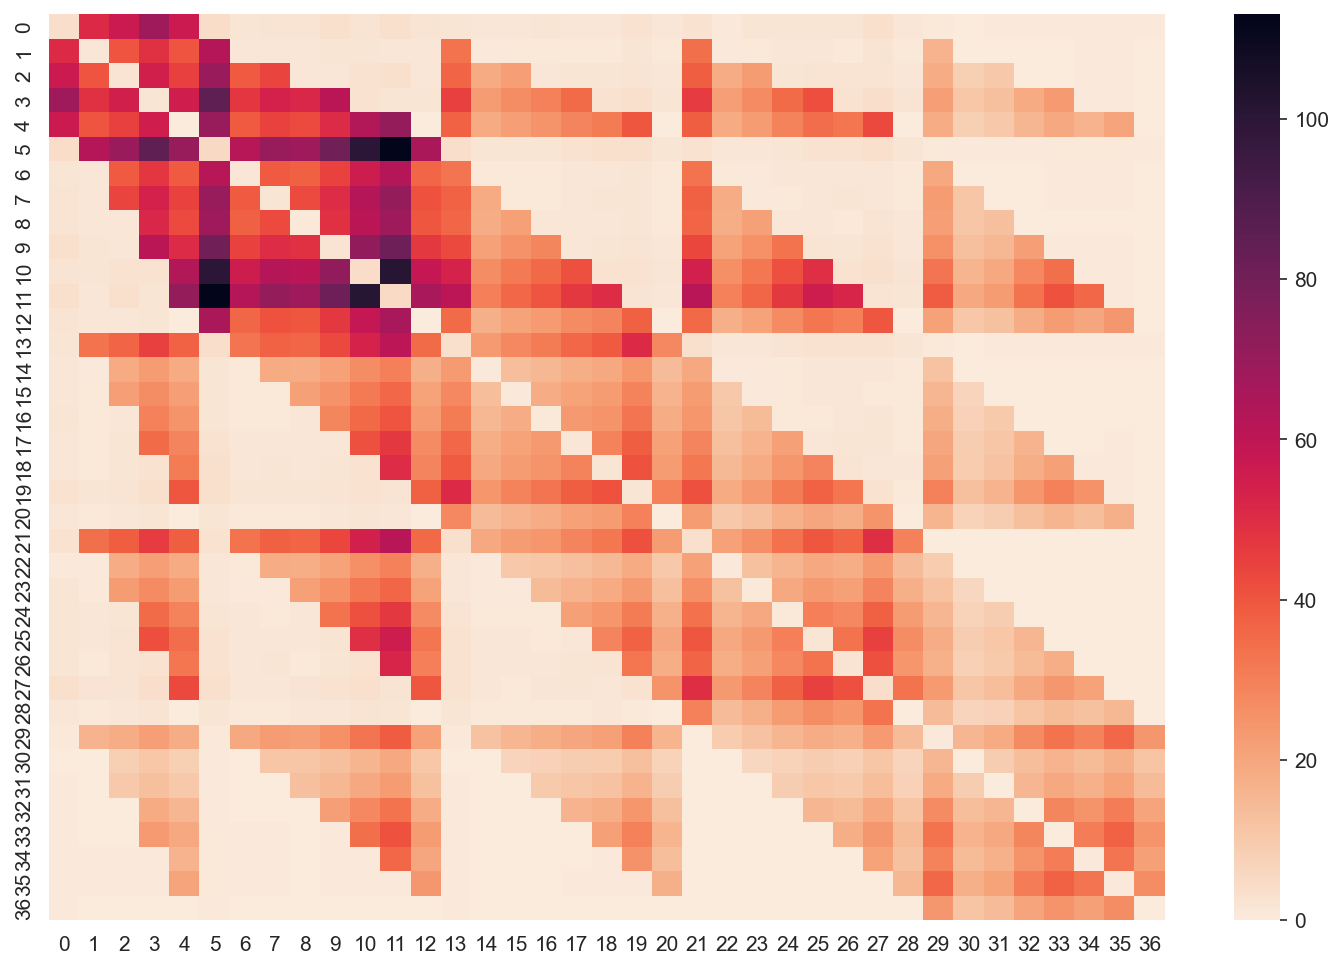

In [95]:
plt.figure(figsize=(12, 8), dpi=150)

sns.heatmap(np.power(np.abs(abhfixed.hessian[0] - abh.hessian[0]), 1/5), cmap='rocket_r')

<AxesSubplot:>

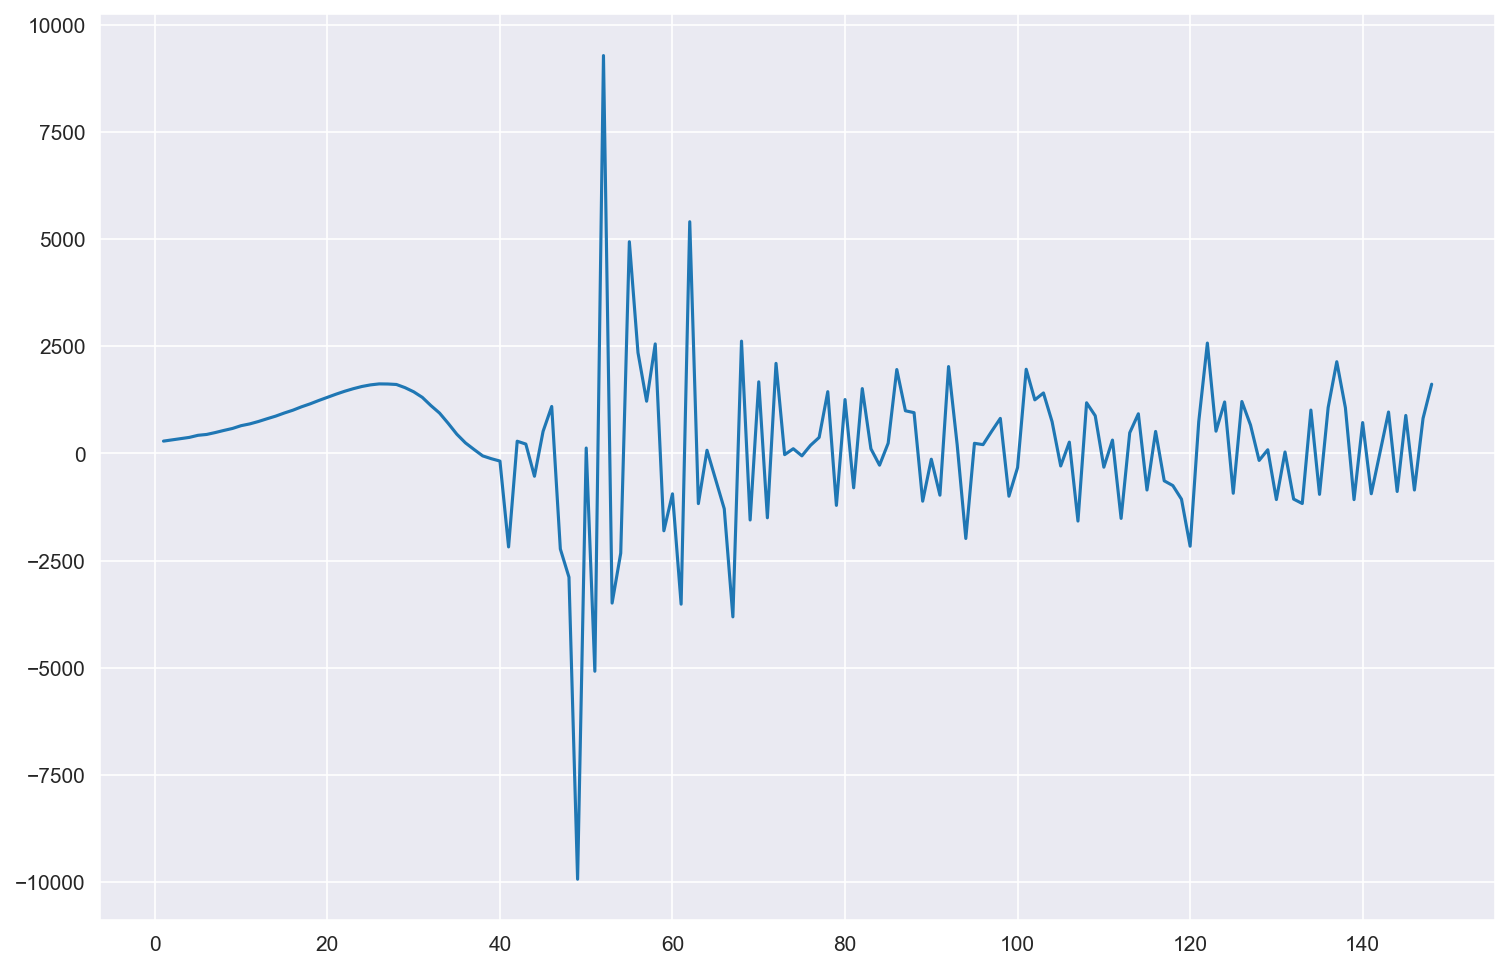

In [50]:
endn = len(abhst.errors) - 1
ggs = []

for i in range(1, endn):
    g = abh.errors[i] - abh.errors[i - 1]
    stg = abhst.errors[i] - abhst.errors[i - 1]
    ggs.append(g - stg)

plt.figure(figsize=(12, 8), dpi=150)
sns.lineplot(x=[x for x in range(1, endn)], y=ggs)

In [34]:
abhlla.evs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-3.450493e+09,-4.892330e+08,-3.661020e+08,-2.172266e+08,-1.129083e+08,-7.601197e+07,-3.638091e+07,-1.683134e+07,-1.585078e+07,-9.747259e+06,-2.422834e+06,-1.717134e+06,-1.433501e+06,-505860.923724,-383420.578052,-145682.504466,-83647.180431,-10097.966800,-8883.006207,-417.177849,84978.181070,209591.586456,893275.739435,1.562423e+06,3.388373e+06,3.690367e+06,9.670413e+06,1.947119e+07,1.067062e+08,2.117435e+08,2.509236e+08,4.061927e+08,5.167639e+08,6.716953e+08,1.180214e+09,4.721665e+09,4.624709e+10
1,-3.474469e+09,-4.935767e+08,-3.688052e+08,-2.161859e+08,-1.128084e+08,-7.690538e+07,-3.581992e+07,-1.697254e+07,-1.616756e+07,-1.023321e+07,-2.420658e+06,-1.730252e+06,-1.474717e+06,-470734.461256,-402038.679895,-137776.413953,-82839.436932,-13505.741746,-3067.148995,-146.205056,143334.631360,265023.948519,727859.644287,1.619713e+06,3.192439e+06,3.451379e+06,8.344989e+06,1.941106e+07,1.062292e+08,1.946900e+08,2.475759e+08,4.045875e+08,5.106831e+08,6.642103e+08,1.169775e+09,4.728792e+09,4.631606e+10
2,-3.460677e+09,-4.935168e+08,-3.681169e+08,-2.146160e+08,-1.131847e+08,-7.663414e+07,-3.586517e+07,-1.700373e+07,-1.619125e+07,-9.979540e+06,-2.309398e+06,-1.492959e+06,-1.444502e+06,-468960.406636,-385241.528174,-134116.047601,-81207.221884,-12687.246787,-2817.888088,-210.694083,147896.812538,315493.983445,772511.513771,1.613914e+06,3.124095e+06,3.430733e+06,8.491292e+06,1.948972e+07,1.064507e+08,1.863903e+08,2.454757e+08,4.049094e+08,5.174022e+08,6.661485e+08,1.178367e+09,4.701143e+09,4.621057e+10
3,-3.471345e+09,-4.941120e+08,-3.689849e+08,-2.133999e+08,-1.130020e+08,-7.677724e+07,-3.569973e+07,-1.709216e+07,-1.625904e+07,-1.009187e+07,-2.326010e+06,-1.523778e+06,-1.456564e+06,-475164.248309,-365093.309896,-134130.344910,-78417.073410,-13885.782422,-1919.989748,-195.583653,149769.120024,357832.361222,815907.932302,1.626564e+06,3.088166e+06,3.329723e+06,8.001832e+06,1.947295e+07,1.062027e+08,1.847267e+08,2.428996e+08,4.043812e+08,5.132441e+08,6.636877e+08,1.170410e+09,4.704929e+09,4.626440e+10
4,-3.464181e+09,-4.943694e+08,-3.689028e+08,-2.144425e+08,-1.132180e+08,-7.674346e+07,-3.585232e+07,-1.713831e+07,-1.626177e+07,-9.979772e+06,-2.302724e+06,-1.493815e+06,-1.442951e+06,-473846.231197,-345297.664468,-133947.439960,-78423.597480,-13216.073246,-1928.382640,-194.730659,150608.548522,352812.167057,787167.309360,1.616161e+06,3.040455e+06,3.376906e+06,8.133941e+06,1.949574e+07,1.063142e+08,1.845026e+08,2.435573e+08,4.042893e+08,5.153315e+08,6.640842e+08,1.173151e+09,4.689669e+09,4.622522e+10
5,-3.469065e+09,-4.943459e+08,-3.692298e+08,-2.133312e+08,-1.130906e+08,-7.674288e+07,-3.574032e+07,-1.715505e+07,-1.627902e+07,-1.002967e+07,-2.308720e+06,-1.507443e+06,-1.448585e+06,-480495.632929,-336132.383532,-134322.600729,-76399.184214,-13913.435527,-1566.343546,-167.978567,150369.948231,351257.873490,836472.501645,1.623494e+06,3.018626e+06,3.315879e+06,7.857293e+06,1.949035e+07,1.061711e+08,1.821767e+08,2.419386e+08,4.040200e+08,5.131130e+08,6.625480e+08,1.168557e+09,4.692004e+09,4.625230e+10
6,-3.464611e+09,-4.945192e+08,-3.692252e+08,-2.146124e+08,-1.132302e+08,-7.679692e+07,-3.588838e+07,-1.719243e+07,-1.627593e+07,-9.976467e+06,-2.303310e+06,-1.519295e+06,-1.456876e+06,-480278.491388,-321863.359400,-135025.569624,-76685.017420,-13392.723425,-1483.197051,-161.239932,151696.928892,343180.487303,798801.675425,1.613038e+06,2.999936e+06,3.374762e+06,7.998829e+06,1.949770e+07,1.062634e+08,1.851569e+08,2.430634e+08,4.039644e+08,5.140889e+08,6.629693e+08,1.169889e+09,4.683127e+09,4.623343e+10
7,-3.466704e+09,-4.943376e+08,-3.692727e+08,-2.132929e+08,-1.131445e+08,-7.674525e+07,-3.576990e+07,-1.719253e+07,-1.628942e+07,-9.993297e+06,-2.300331e+06,-1.504608e+06,-1.449916e+06,-485615.532677,-314750.318003,-134827.112082,-74688.390384,-13894.127474,-1292.009757,-125.864871,151018.343000,336571.594222,852723.814886,1.620448e+06,2.975350e+06,3.31924

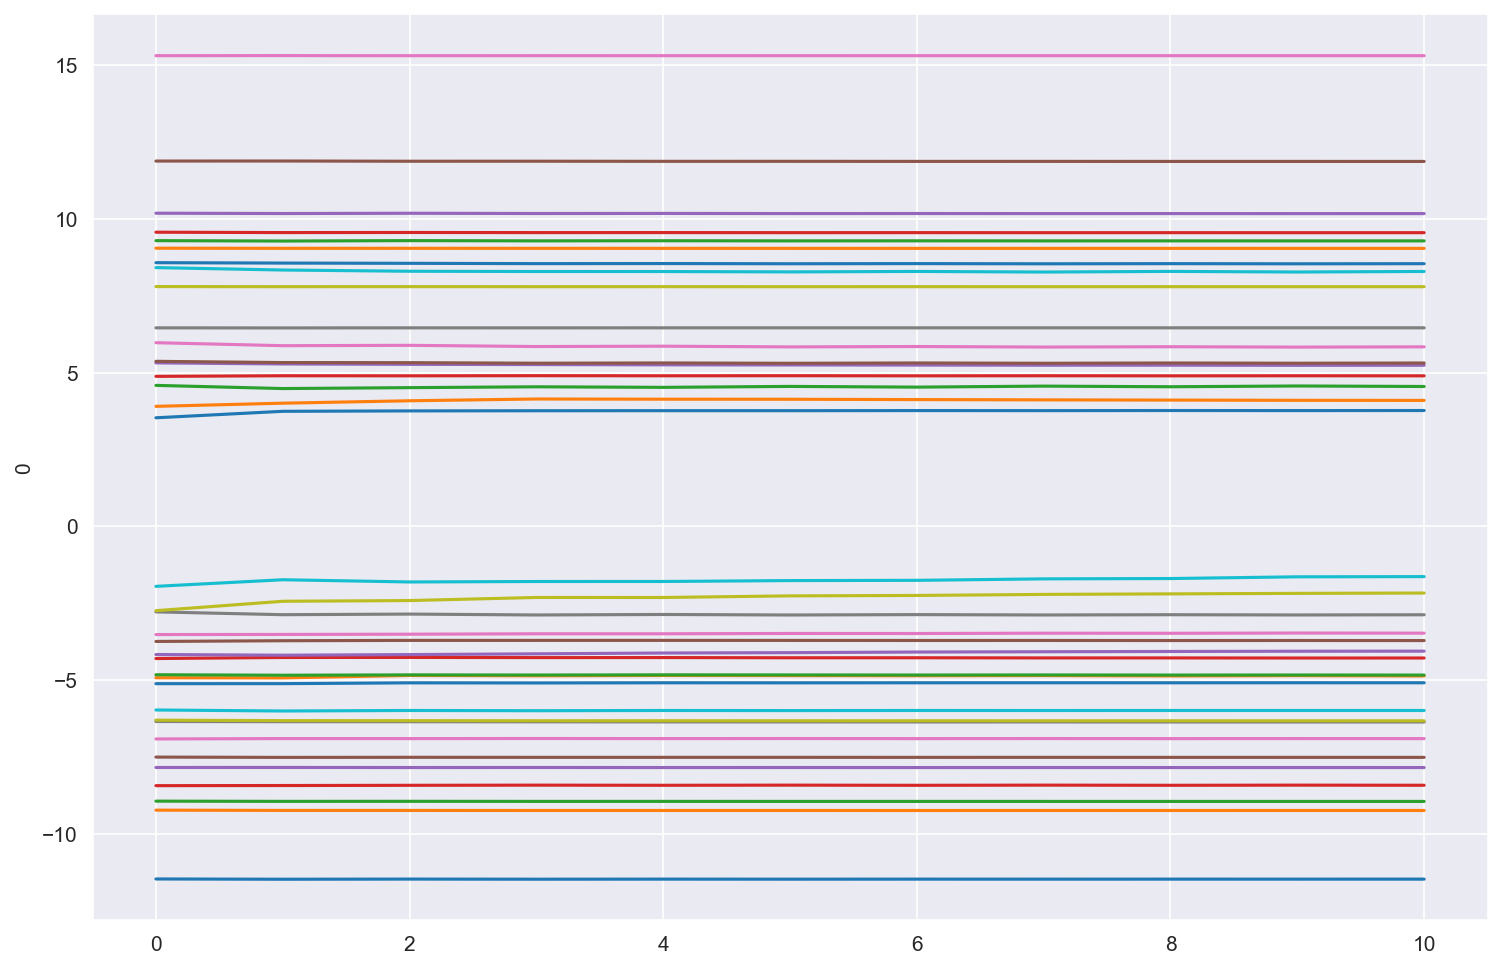

In [21]:
logevs = np.sign(abhlla.evs) * abhlla.evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

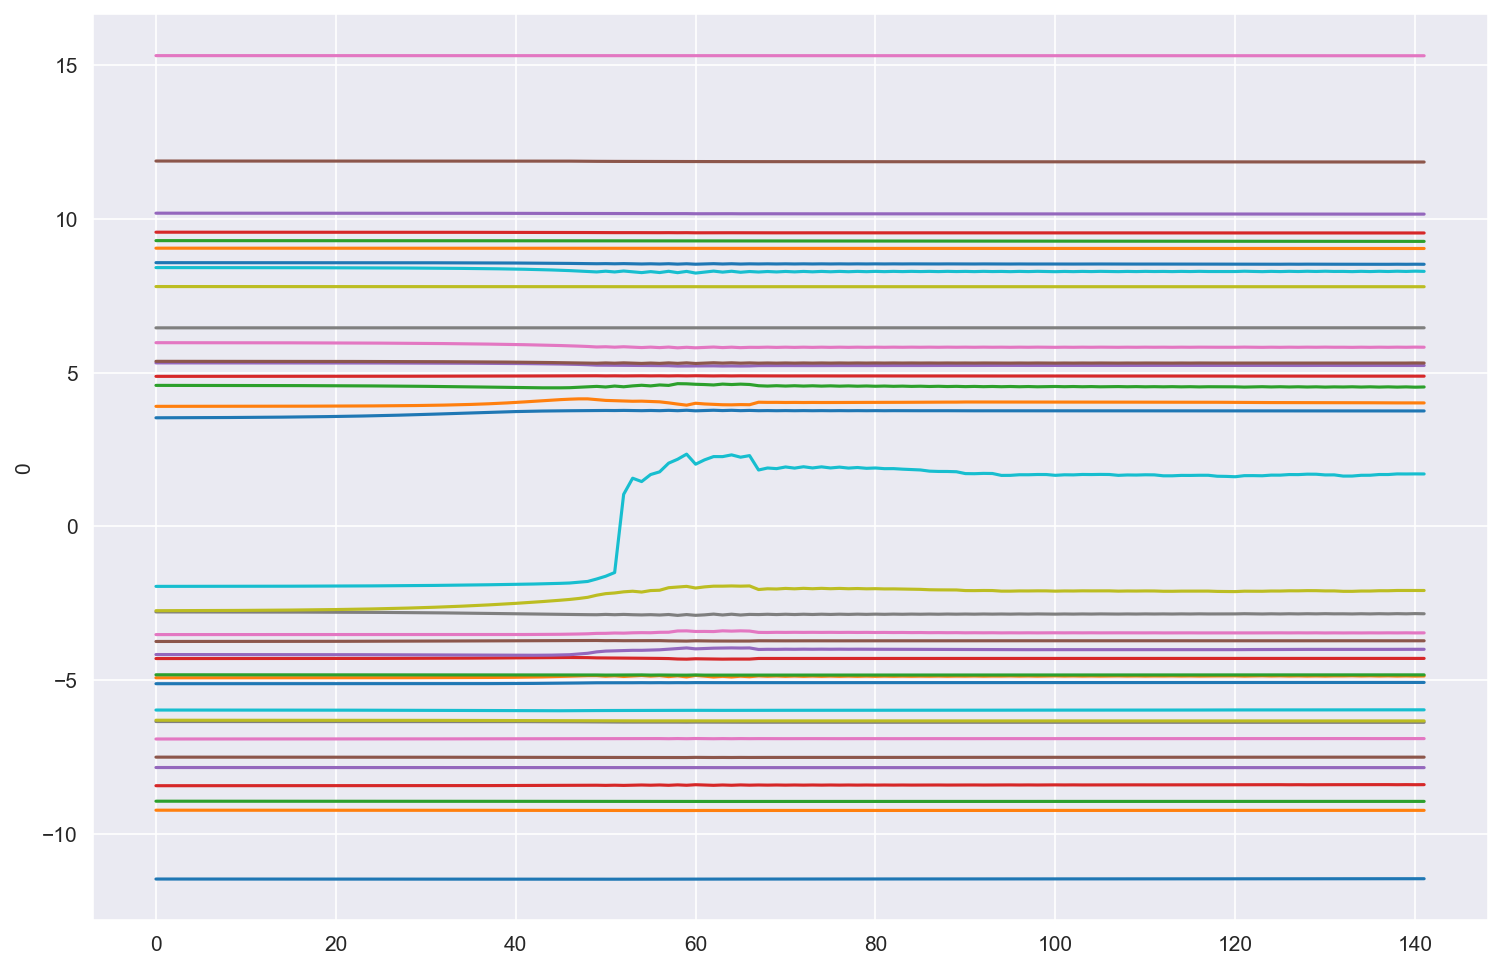

In [196]:
logevs = np.sign(evs) * evs.abs() ** (1 / 9)
# logevs = np.sign(evs) * np.log10(evs.abs())

plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(logevs.columns)):
    sns.lineplot(x=logevs.index, y=logevs[i])

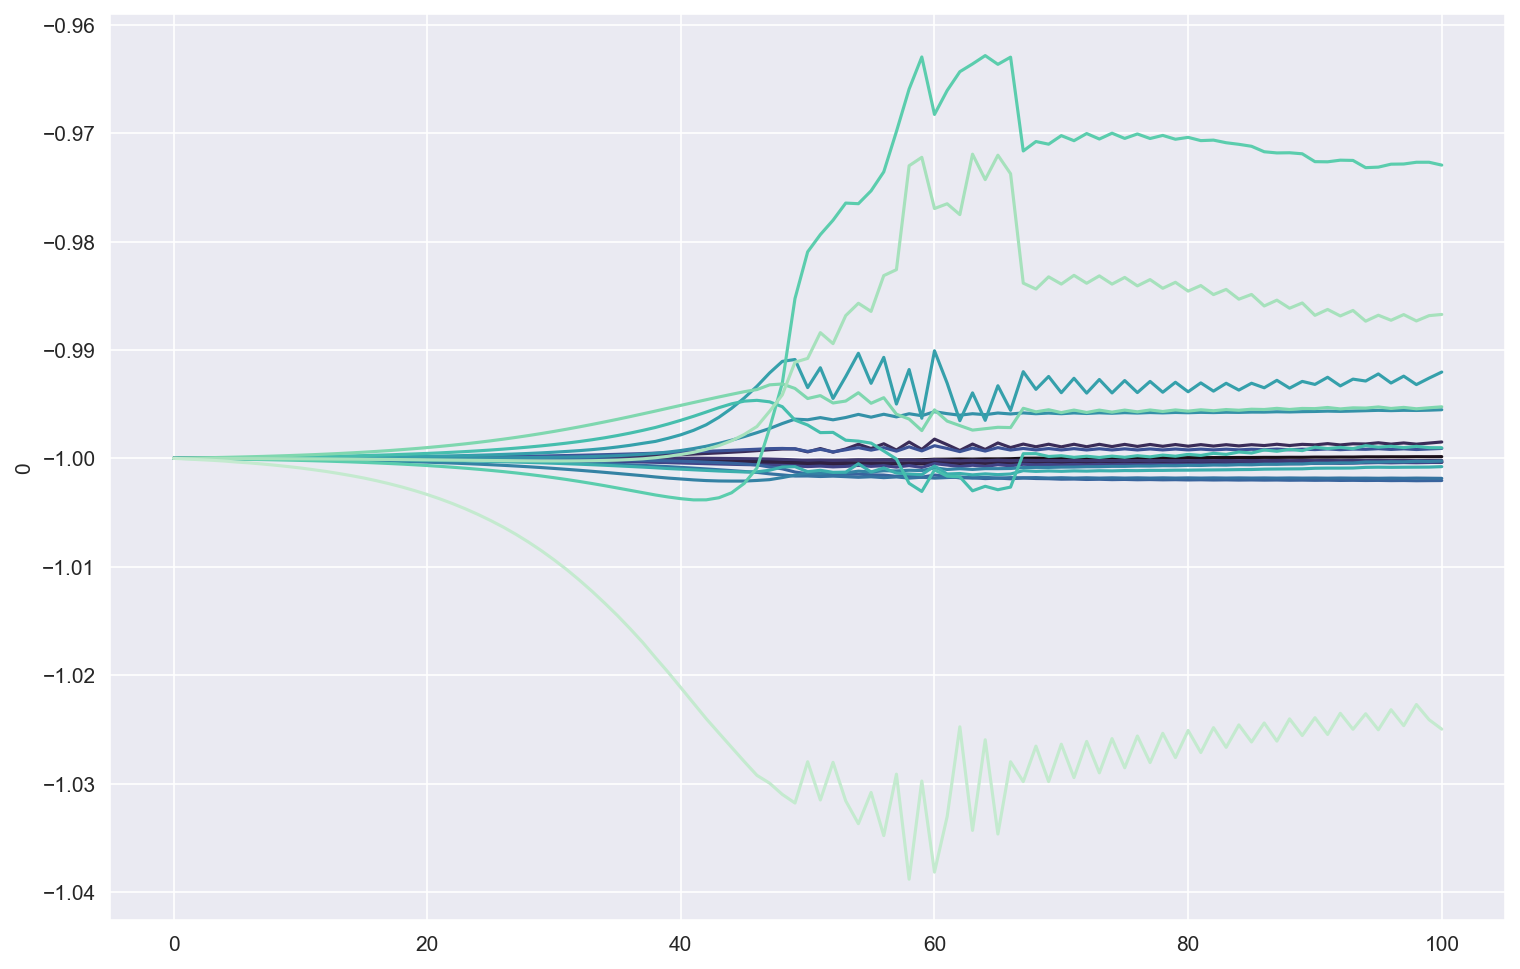

In [181]:
plt.figure(figsize=(12, 8), dpi=150)

n = len(logevs.columns)
n = 18
pal = sns.color_palette('mako', n)
for i in range(n):
    sns.lineplot(x=logevs.index, y=logevs[i] / abs(logevs.iloc[0, i]), color=pal[i])
